--------------
# <div style="text-align: center;"> **Data Exploration and EDA** </div>
--------------

In [15]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import sklearn
import datetime
from datetime import datetime
pd.set_option('display.max_columns', None)
import warnings; warnings.filterwarnings('ignore')
from src.utils import show_null_percentage, softcapping

## **Step 1 - Reading the Data**

----------------

In [17]:

data_path = r"G:\\My Drive\\Study\\Project - Credit Card Fraud Detection\\Data\\fraudTrain.csv"
df = pd.read_csv(data_path, index_col=0)
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [18]:
# Checking for a Unique ID
# ------------------------
print("Shape of the Data: ",df.shape)
print("\nChecking unique values of cardholders and transactions\n")
print("Unique cardholders     : ",df['trans_num'].nunique())
print("Unique Transaction IDs : ",df['cc_num'].nunique())

# The transaction number is a unique key to identify the rows.

Shape of the Data:  (1296675, 22)

Checking unique values of cardholders and transactions

Unique cardholders     :  1296675
Unique Transaction IDs :  983


Looking at the data, we can observe that there are around a 1000 cardholders with over 1.15 Million transactions.

## **Step 2: Data Inspection and Basic Data Cleaning**
----------------------------

1. Looking at the basic data types

2. Checking for Missing/Null Values

3. Checking for Duplicates



5. Check the number of unique values of each column
6. Check statistics of data set
7. Check various categories present in the different categorical column

### 2.1) Looking at the data types

In [19]:
# Checking Data Types
# -------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

We can see a lot of `string` values, and even the "transaction data and time", and "DOB" column is object. 

We also see some `int` and `float` values.

**Issue**<br>
- The "transaction data and time" column is also not in the desired format, so we will convert it into "datetime" format.
- We would also have to do the same for the "DOB" column


***There doesn't seem to be any NULL values present in the data, but we will explore this later***

-----------------

In [22]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], format='ISO8601')
df["dob"] = pd.to_datetime(df["dob"], format='ISO8601')
print("Type of trans_date_trans_time: ", df['trans_date_trans_time'].dtype)
print("Type of dob                  : ", df['trans_date_trans_time'].dtype)

Type of trans_date_trans_time:  datetime64[ns]
Type of dob                  :  datetime64[ns]


In [7]:
# We successfully converted "trans_date_trans_time" to datetime.

### 2.2) Checking the NULL values

In [8]:
# Further exploring the dataset for NULL values.
show_null_percentage(df)

,number_of_missing_values,percent_missing


In [9]:
# There are no null values in this dataframe.

### 2.3) Checking for duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
# There are no duplicate values in this dataframe.

### 2.4) Checking the Target Variable ("is_fraud")

In [12]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [15]:
# It can be seen that the target variable is highly imbalanced.
# So we will have to take care of the imbalance before modelling.

### 2.5) Inspecting the Numerical Columns & Categorical Columns

In [16]:
# Getting statistical idea of the Numerical Columns
df.describe().round(2)

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,1296675,1.296675e+06,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675,1.296675e+06,1296675.00,1296675.00,1296675.00
mean,2019-10-03 12:47:28.070214144,4.171920e+17,70.35,48800.67,38.54,-90.23,88824.44,1973-10-03 19:02:55.017178512,1.349244e+09,38.54,-90.23,0.01
min,2019-01-01 00:00:18,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1924-10-30 00:00:00,1.325376e+09,19.03,-166.67,0.00
25%,2019-06-03 19:12:22.500000,1.800429e+14,9.65,26237.00,34.62,-96.80,743.00,1962-08-13 00:00:00,1.338751e+09,34.73,-96.90,0.00
50%,2019-10-03 07:35:47,3.521417e+15,47.52,48174.00,39.35,-87.48,2456.00,1975-11-30 00:00:00,1.349250e+09,39.37,-87.44,0.00
75%,2020-01-28 15:02:55.500000,4.642255e+15,83.14,72042.00,41.94,-80.16,20328.00,1987-02-22 00:00:00,1.359385e+09,41.96,-80.24,0.00
max,2020-06-21 12:13:37,4.992346e+18,28948.90,99783.00,66.69,-67.95,2906700.00,2005-01-29 00:00:00,1.371817e+09,67.51,-66.95,1.00
std,NaN,1.308806e+18,160.32,26893.22,5.08,13.76,301956.36,NaN,1.284128e+07,5.11,13.77,0.08


In [17]:
### Inspecting Categorical columns
### ------------------------------
# Checking unique values for each categorical column
print("Number of Unique merchants  : ", df['merchant'].nunique())
print("Number of unique categories : ", df['category'].nunique())
print("Number of unique states     : ", df['state'].nunique())
print("Number of unique cities     : ", df['city'].nunique())
print("Number of unique job        : ", df['job'].nunique())

Number of Unique merchants  :  693
Number of unique categories :  14
Number of unique states     :  51
Number of unique cities     :  894
Number of unique job        :  494


In [15]:
# Separating numerical and categorical features
# ---------------------------------------------

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

We have 10 categorical features : ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num']


## **Feature Engineering**
----------------

We can create some new columns/variables using the existing ones.

- `Age`: This can be calculated using the Date of birth (dob) column.
- `Year_transaction`: This will show the year of transaction.
- `Month_transaction`: This will show the month of transaction.


---------------

In [15]:
# Getting the age from Date of birth - dob
# ----------------------------------------
from datetime import date, datetime
current_date = datetime.combine(date.today(), datetime.min.time()) # Get the current date & converting it into datetime
df['Age'] = (current_date - df['dob']) // pd.Timedelta(days=365.25)
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44


In [16]:
# Getting the month and year from trans_date_trans_time
# -----------------------------------------------------
df['year_transaction'] = df['trans_date_trans_time'].dt.year
df['month_transaction'] = df['trans_date_trans_time'].dt.month

## **Exploratory Data Analysis**
--------------------

### Univariate - Quantitative Variables

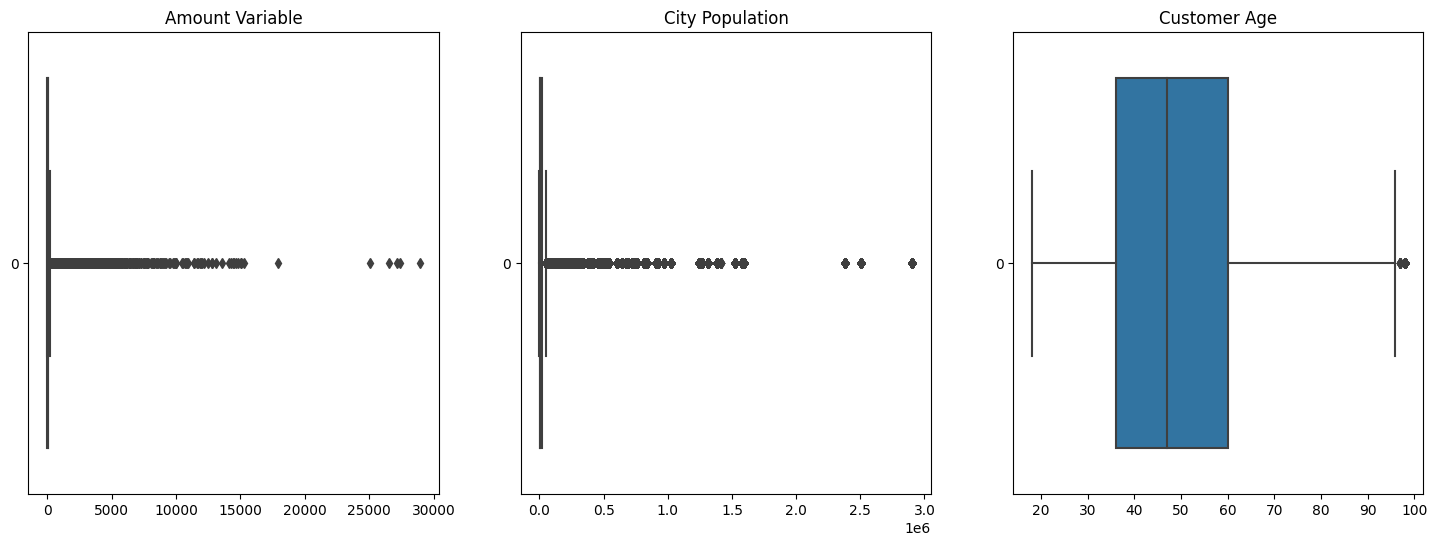

In [17]:
# Visualizing the various quantitative variable
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(df['amt'], orient='h')
plt.title("Amount Variable")

plt.subplot(1,3,2)
sns.boxplot(df['city_pop'], orient='h')
plt.title("City Population")

plt.subplot(1,3,3)
sns.boxplot(df['Age'], orient='h')
plt.title("Customer Age")

plt.show()

We observe a lot of outliers for the 'amt' variable. Since, these might affect our further analysis, we need get rid of them.

***We will be using softcapping for outlier treatment.***


In [18]:
# Softcapping the Outliers
# ------------------------
df = softcapping(df, 'amt', 0.1, 0.99)
print(df.shape)

(1154287, 25)


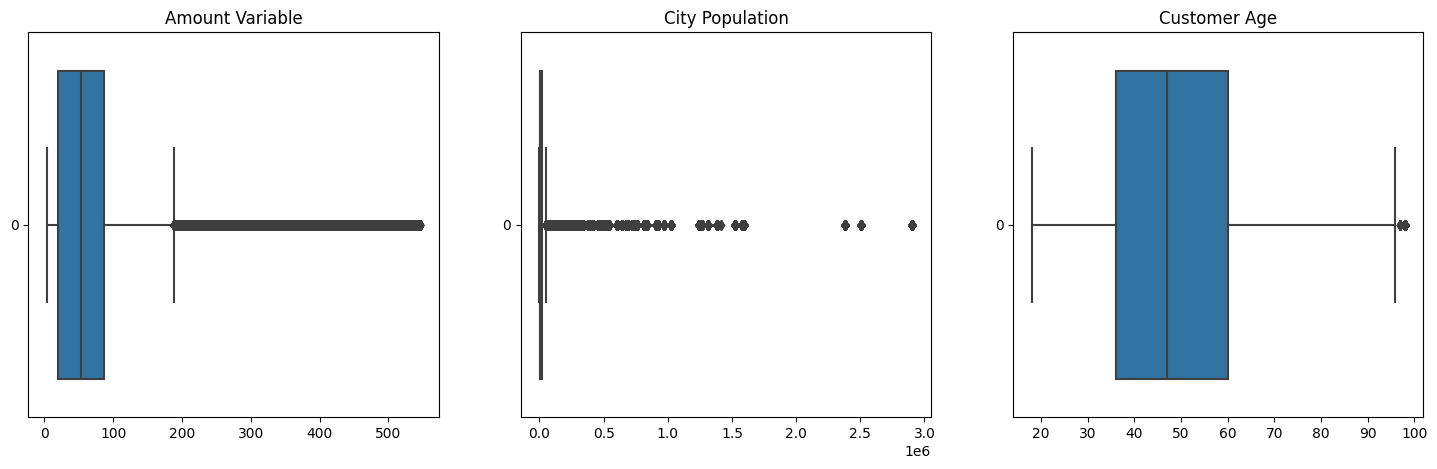

In [19]:
# Plotting Distributions for Quantitative Variables
# -------------------------------------------------
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.boxplot(df['amt'], orient='h')
plt.title("Amount Variable")

plt.subplot(1,3,2)
sns.boxplot(df['city_pop'], orient='h')
plt.title("City Population")

plt.subplot(1,3,3)
sns.boxplot(df['Age'], orient='h')
plt.title("Customer Age")

plt.show()

**We can see that for the 'amt' columns, extreme outliers are removed.**

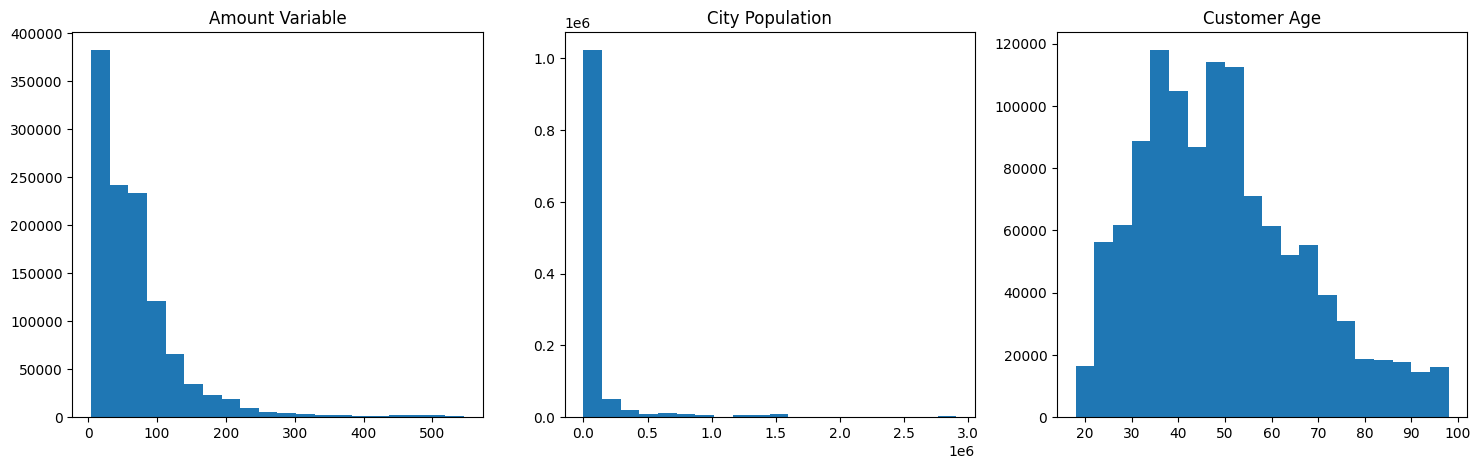

In [20]:
# Plotting Distributions for Quantitative Variables
# -------------------------------------------------
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.hist(df['amt'], bins=20)
plt.title("Amount Variable")

plt.subplot(1,3,2)
plt.hist(df['city_pop'], bins=20)
plt.title("City Population")

plt.subplot(1,3,3)
plt.hist(df['Age'], bins=20)
plt.title("Customer Age")

plt.show()

In [21]:
# Observations
# ------------


### Univariate - Categorical Variables

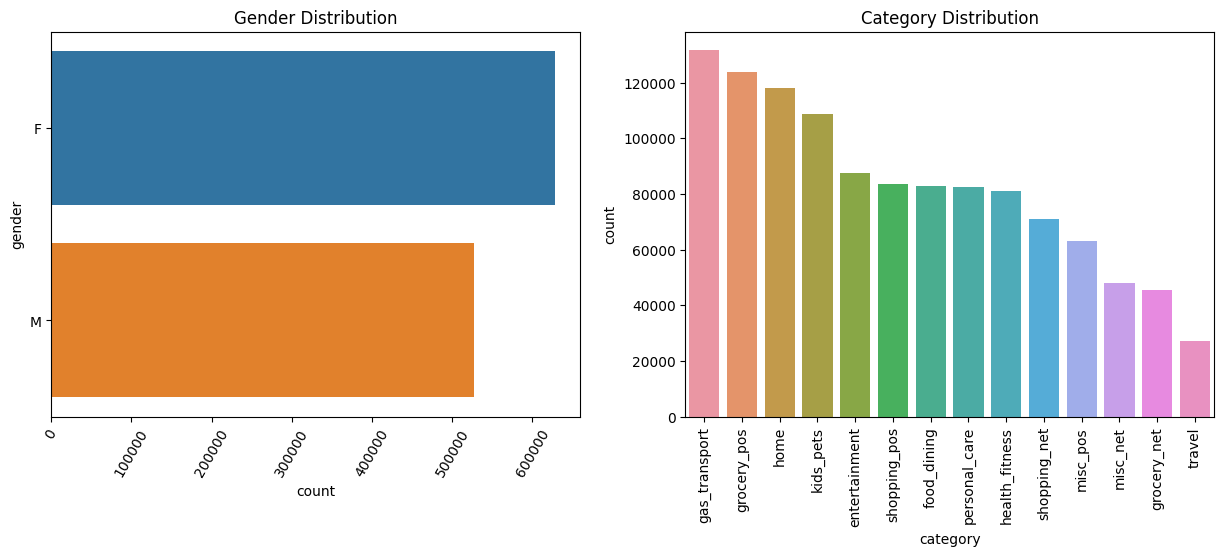

In [22]:
# Visualizing the various Categorical variables
# ---------------------------------------------

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(y='gender', data=df)
plt.xticks(rotation=60)
plt.title('Gender Distribution')

plt.subplot(1,2,2)
# Get the value counts in descending order
category_count = df['category'].value_counts().sort_values(ascending=False)
sns.countplot(x='category', data=df, order=category_count.index)
plt.xticks(rotation=90)
plt.title('Category Distribution')

plt.show()

In [23]:
# Observations
# ------------


### Bivariate Analysis

**Observations**

We see that number of female victims of fraud are a little more as compared to male victims.

In [24]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Age,year_transaction,month_transaction
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35,2019,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44,2019,1


In [25]:
# def fraud_status(x):
#     if x==1:        return "Fraud"
#     else:           return "Not Fraud"
# df['is_fraud'] = df['is_fraud'].apply(fraud_status)
# df.head(1)

# Creating a csv copy
# -------------------
# df.to_csv("G:\\My Drive\\Study\\Project - Credit Card Fraud Detection\\Data\\Clean_data_1.csv")

## **Preparing Data Data Modelling**
---------------

In [26]:
# Setting the transaction id as index
# -----------------------------------
df.set_index('trans_num', inplace=True)
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,Age,year_transaction,month_transaction
trans_num,,,,,,,,,,,,,,,,,,,,,,,,
0b242abb623afc578575680df30655b9,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,35,2019,1
1f76529f8574734946361c461b024d99,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,44,2019,1


In [27]:
# Generating a sample of Data for faster computing
# ------------------------------------------------
# df_1 = df.sample(n=20000, )
# df_fraud = df[df['is_fraud']=='Fraud']
# df_notfraud = df[df['is_fraud']=='Not Fraud']
# df_notfraud_sample = df_notfraud.sample(20000, random_state=42, replace=True)

# # Concatenate the dataframes row-wise
# df_1 = pd.concat([df_fraud, df_notfraud_sample], axis=0)
# display(df_1.head(2))

In [28]:
# Filtering the columns we need
# -----------------------------
required_columns = ['category', 'amt', 'gender', 'state', 'city',
                    'city_pop', 'Age', 'year_transaction', 
                    'month_transaction', 'is_fraud']

df_2 = df[required_columns]
print("Shape of Data: ", df_2.shape)
display(df_2.head())


Shape of Data:  (1154287, 10)


,category,amt,gender,state,city,city_pop,Age,year_transaction,month_transaction,is_fraud
trans_num,,,,,,,,,,
0b242abb623afc578575680df30655b9,misc_net,4.97,F,NC,Moravian Falls,3495,35,2019,1,0
1f76529f8574734946361c461b024d99,grocery_pos,107.23,F,WA,Orient,149,44,2019,1,0
a1a22d70485983eac12b5b88dad1cf95,entertainment,220.11,M,ID,Malad City,4154,61,2019,1,0
6b849c168bdad6f867558c3793159a81,gas_transport,45.00,M,MT,Boulder,1939,56,2019,1,0
a41d7549acf90789359a9aa5346dcb46,misc_pos,41.96,M,VA,Doe Hill,99,37,2019,1,0


In [29]:
print(df_2.is_fraud.value_counts())

0    1150399
1       3888
Name: is_fraud, dtype: int64


In [30]:
print(df_2['year_transaction'].value_counts())

2019    823433
2020    330854
Name: year_transaction, dtype: int64


In [31]:
# Encoding the variables
# ----------------------

from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical column
df_2['category_encoded'] = ordinal_encoder.fit_transform(df_2[['category']])
df_2['city_encoded'] = ordinal_encoder.fit_transform(df_2[['city']])
df_2['state_encoded'] = ordinal_encoder.fit_transform(df_2[['state']])

def gender_(x):
    if x == 'M':    return 1
    else:           return 0
df_2['gender'] = df_2['gender'].apply(gender_)

def year_(x):
    if x == 2019:   return 1
    else:           return 0
df_2['year_transaction'] = df['year_transaction'].apply(year_)


df_2.drop(['category', 'city', 'state'], axis=1, inplace=True)



In [32]:
print(df_2.is_fraud.value_counts())

0    1150399
1       3888
Name: is_fraud, dtype: int64


In [33]:
# Applying Standard Scaling
# -------------------------
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()

scaled_data_temp = std_scalar.fit_transform(df_2['city_pop'].values.reshape(-1,1))

df_2['city_pop'] = scaled_data_temp
df_2.head()

,amt,gender,city_pop,Age,year_transaction,month_transaction,is_fraud,category_encoded,city_encoded,state_encoded
trans_num,,,,,,,,,,
0b242abb623afc578575680df30655b9,4.97,0,-0.281038,35,1,1,0,8.0,526.0,27.0
1f76529f8574734946361c461b024d99,107.23,0,-0.292141,44,1,1,0,4.0,612.0,47.0
a1a22d70485983eac12b5b88dad1cf95,220.11,1,-0.278851,61,1,1,0,0.0,468.0,13.0
6b849c168bdad6f867558c3793159a81,45.00,1,-0.286201,56,1,1,0,2.0,84.0,26.0
a41d7549acf90789359a9aa5346dcb46,41.96,1,-0.292307,37,1,1,0,9.0,216.0,45.0


## **Modelling the Data**

------------------

### **Deciding on the metric to check model performance**

I will be using the 

#### **Confusion Matrix**

`True Positive`: Predicted values is Fraud(1), and True Value is also Fraud(1).

`True Negative`: Predicted values is Not-Fraud(0), and True Value is also Not-Fraud(0).

`False Positive`: Predicted value is Fraud(1), and True Value is Not-Fraud(0).

`False Negative`: Predicted value is Not-Fraud(0), and True Value is Fraud(1).


### **Logistic Regression**

In [62]:
    
# Training & Testing split
df_train, df_test = train_test_split(df_2,
                                                test_size=0.2,
                                                random_state=50, 
                                                stratify=df_2['is_fraud'])

# print(df_train.is_fraud.value_counts())
# print(df_test.is_fraud.value_counts())

# Dividing training data into target and predictors
Y = df_train['is_fraud']
X = df_train.drop('is_fraud', axis=1)

# Defining the Stratified KFold object
skfold = StratifiedKFold(n_splits=5, shuffle=True)

model =LogisticRegression(solver='sag', n_jobs=-1, class_weight='balanced')

fold = 1

print("Model Training!!")

for train_index, validation_index in skfold.split(X, Y):
    X_train, X_val = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[validation_index]
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    print(f"Fold {fold} --> Accuracy = {round(accuracy_score(y_val, y_val_pred),4)} : F1-Score = {round(f1_score(y_val, y_val_pred),4)} : "Matthews Corr. Coeff. = {round(matthews_corrcoef(y_val, y_val_pred),2)}")
    fold+=1
print("\nTRAINING COMPLETE!!")
print("--------------------------------------------")

# Testing on unseen data
y_test = df_test['is_fraud']
X_test = df_test.drop('is_fraud', axis=1)

print("Testing Logistic Regression on unseen data!!")
print("--------------------------------------------")
y_test_pred = model.predict(X_test)

print("Accuracy                     - ", round(accuracy_score(y_test, y_test_pred),4))
print("Precision                    - ", round(precision_score(y_test, y_test_pred),4))
print("Recall                       - ", round(recall_score(y_test, y_test_pred),4)) 
print("F1-Score                     - ", round(f1_score(y_test, y_test_pred),4))
print("Matthews Correlation Score   - ", round(matthews_corrcoef(y_true=y_test, y_pred=y_test_pred),4))

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
cm = confusion.astype(int)
print("Confusion Matrix!!")
print(cm)

Model Training!!
Fold 1 --> Accuracy = 0.9547 : F1-Score = 0.0691
Matthews Corr. Coeff. = 0.13
Fold 2 --> Accuracy = 0.6907 : F1-Score = 0.0129
Matthews Corr. Coeff. = 0.04
Fold 3 --> Accuracy = 0.819 : F1-Score = 0.0213
Matthews Corr. Coeff. = 0.06
Fold 4 --> Accuracy = 0.8498 : F1-Score = 0.0249
Matthews Corr. Coeff. = 0.07
Fold 5 --> Accuracy = 0.1185 : F1-Score = 0.0071
Matthews Corr. Coeff. = 0.01

TRAINING COMPLETE!!
--------------------------------------------
Testing Logistic Regression on unseen data!!
--------------------------------------------
Accuracy                     -  0.1195
Precision                    -  0.0035
Recall                       -  0.928
F1-Score                     -  0.0071
Matthews Correlation Score   -  0.0081
Confusion Matrix!!
[[ 26856 203224]
 [    56    722]]


### **Random Forest**

In [66]:
# Training & Testing split
df_train, df_test = train_test_split(df_2,
                                                test_size=0.2,
                                                random_state=50, 
                                                stratify=df_2['is_fraud'])

# print(df_train.is_fraud.value_counts())
# print(df_test.is_fraud.value_counts())

# Dividing training data into target and predictors
Y = df_train['is_fraud']
X = df_train.drop('is_fraud', axis=1)

# Defining the Stratified KFold object
skfold = StratifiedKFold(n_splits=5, shuffle=True)

model = RandomForestClassifier(n_jobs=-1, class_weight='balanced')

fold = 1

print("Model Training!!")

for train_index, validation_index in skfold.split(X, Y):
    X_train, X_val = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[validation_index]
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    print(f"Fold {fold} --> Accuracy = {round(accuracy_score(y_val, y_val_pred),4)} : F1-Score = {round(f1_score(y_val, y_val_pred),4)} : "Matthews Corr. Coeff. = {round(matthews_corrcoef(y_val, y_val_pred),2)}")
    fold+=1
print("\nTRAINING COMPLETE!!")
print("--------------------------------------------")

# Testing on unseen data
y_test = df_test['is_fraud']
X_test = df_test.drop('is_fraud', axis=1)

print("Testing Random Forest Classifier on unseen data!!")
print("--------------------------------------------")
y_test_pred = model.predict(X_test)

print("Accuracy                     - ", round(accuracy_score(y_test, y_test_pred),4))
print("Precision                    - ", round(precision_score(y_test, y_test_pred),4))
print("Recall                       - ", round(recall_score(y_test, y_test_pred),4)) 
print("F1-Score                     - ", round(f1_score(y_test, y_test_pred),4))
print("Matthews Correlation Score   - ", round(matthews_corrcoef(y_true=y_test, y_pred=y_test_pred),4))

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
cm = confusion.astype(int)
print("Confusion Matrix!!")
print(cm)


Model Training!!
Fold 1 --> Accuracy = 0.986 : F1-Score = 0.1356 : Matthews Corr. Coeff. = 0.16
Fold 2 --> Accuracy = 0.986 : F1-Score = 0.1317 : Matthews Corr. Coeff. = 0.16
Fold 3 --> Accuracy = 0.9862 : F1-Score = 0.1321 : Matthews Corr. Coeff. = 0.16
Fold 4 --> Accuracy = 0.9858 : F1-Score = 0.1244 : Matthews Corr. Coeff. = 0.15
Fold 5 --> Accuracy = 0.9864 : F1-Score = 0.1402 : Matthews Corr. Coeff. = 0.17

TRAINING COMPLETE!!
--------------------------------------------
Testing Logistic Regression on unseen data!!
--------------------------------------------
Accuracy                     -  0.9864
Precision                    -  0.0795
Recall                       -  0.2879
F1-Score                     -  0.1246
Matthews Correlation Score   -  0.146
Confusion Matrix!!
[[227486   2594]
 [   554    224]]


### **Support Vector Machine**

In [1]:
# # Training & Testing split
# df_train, df_test = train_test_split(df_2,
#                                                 test_size=0.2,
#                                                 random_state=50, 
#                                                 stratify=df_2['is_fraud'])

# # print(df_train.is_fraud.value_counts())
# # print(df_test.is_fraud.value_counts())

# # # Dividing training data into target and predictors
# # Y = df_train['is_fraud']
# # X = df_train.drop('is_fraud', axis=1)

# df_train_sample = df_train.sample(100000)
# Y = df_train_sample['is_fraud']
# X = df_train_sample.drop('is_fraud', axis=1)


# # Defining the Stratified KFold object
# skfold = StratifiedKFold(n_splits=5, shuffle=True)

# model = SVC(C=0.05, class_weight='balanced', random_state=50)

# fold = 1

# print("Model Training!!")

# for train_index, validation_index in skfold.split(X, Y):
#     X_train, X_val = X.iloc[train_index], X.iloc[validation_index]
#     y_train, y_val = Y.iloc[train_index], Y.iloc[validation_index]
#     model.fit(X_train, y_train)
#     y_val_pred = model.predict(X_val)
#     print(f"Fold {fold} --> Accuracy = {round(accuracy_score(y_val, y_val_pred),4)} : F1-Score = {round(f1_score(y_val, y_val_pred),4)} : Matthews Corr. Coeff. = {round(matthews_corrcoef(y_val, y_val_pred),2)}")
#     fold+=1
# print("\nTRAINING COMPLETE!!")
# print("--------------------------------------------")

# # Testing on unseen data
# y_test = df_test['is_fraud']
# X_test = df_test.drop('is_fraud', axis=1)

# print("Testing Support Vector Machine Classifier on unseen data!!")
# print("--------------------------------------------")
# y_test_pred = model.predict(X_test)

# print("Accuracy                     - ", round(accuracy_score(y_test, y_test_pred),4))
# print("Precision                    - ", round(precision_score(y_test, y_test_pred),4))
# print("Recall                       - ", round(recall_score(y_test, y_test_pred),4)) 
# print("F1-Score                     - ", round(f1_score(y_test, y_test_pred),4))
# print("Matthews Correlation Score   - ", round(matthews_corrcoef(y_true=y_test, y_pred=y_test_pred),4))

# from sklearn.metrics import confusion_matrix
# confusion = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
# cm = confusion.astype(int)
# print("Confusion Matrix!!")
# print(cm)
